In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
train_df = pd.read_csv('../Handwritten_Digit_Recognition/data/train.csv')
test_df = pd.read_csv('../Handwritten_Digit_Recognition/data/test.csv')


In [3]:
#Get the number of rows and columns:
print('Shape of Train Dataset',train_df.shape)
print('Shape of Test Dataset',test_df.shape)

Shape of Train Dataset (42000, 785)
Shape of Test Dataset (28000, 784)


In [10]:
def print_image(index):
    some_digit = train_df.iloc[index,1:].values
    some_digit_img = some_digit.reshape(28,28)
    plt.imshow(some_digit_img,'binary')
    return some_digit_img

In [31]:
train_df.iloc[1,1:].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  18,  30, 137, 137, 192,  86,  72,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  13,  86, 250, 254, 254, 254, 254, 217,
       246, 151,  32,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  16, 179, 254, 254, 254, 25

NameError: name 'some_digit' is not defined

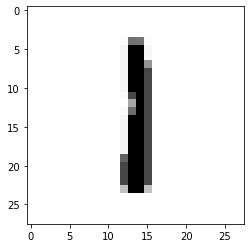

In [11]:
print_image(2)
print(some_digit)

### Checking First 10 Images

In [12]:
X = train_df.drop('label', axis=1)
print("Features shape: ", X.shape)
y = train_df.label
print("Target shape: ", y.shape)

Features shape:  (42000, 784)
Target shape:  (42000,)


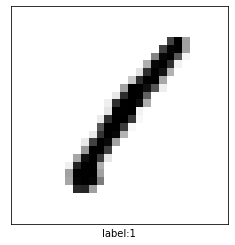

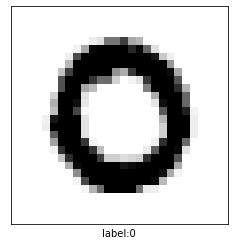

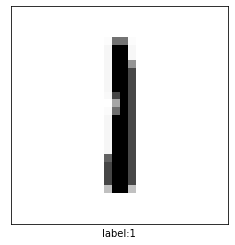

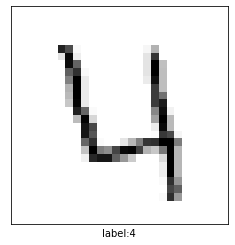

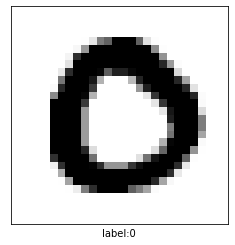

In [13]:
for i in range(5):
    #plt.subplot(5,4, i+1)
    plt.xticks([])
    plt.yticks([])
    print_image(i)
    plt.xlabel('label:{}'.format(y[i]))
    plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=42, test_size=0.2)

### Reshape all DATA's to format 28x28 

In [15]:
X_train.shape

(33600, 784)

In [16]:
import numpy as np

IMG_SIZE = 28
X_trainr = np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE)
X_testr = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE)

print('Training sample shape',X_trainr.shape)
print('Training sample shape',X_testr.shape)




Training sample shape (33600, 28, 28)
Training sample shape (8400, 28, 28)


In [17]:
X_trainr[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  63,
        253, 121,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  63,
        254, 202,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163,
        255, 144,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 167,
        251,  26,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### Resize image to make it suitable for convolutional

In [18]:
import numpy as np

IMG_SIZE = 28
X_trainr = np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X_testr = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)

print('Training sample shape',X_trainr.shape)
print('Training sample shape',X_testr.shape)

Training sample shape (33600, 28, 28, 1)
Training sample shape (8400, 28, 28, 1)


### Data normalisation

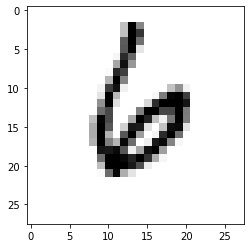

In [19]:
X_train = tf.keras.utils.normalize(X_trainr,axis=1)
X_test = tf.keras.utils.normalize(X_testr,axis=1)
plt.imshow(X_trainr[0],cmap=plt.cm.binary)

Convert classes to oneHot Vector

In [120]:
Y_train.shape

(33600,)

In [121]:
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [122]:
# print(Y_train.shape)
# print(Y_test.shape)

(33600, 10)
(8400, 10)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [56]:
# Create neural network

model = Sequential()

model.add(Conv2D(64,(3,3),input_shape = X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [57]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [58]:
history = model.fit(X_train,Y_train,epochs=5,validation_split=0.3)

Epoch 1/5
735/735 [==============================] - 39s 51ms/step - loss: 0.4664 - accuracy: 0.8503 - val_loss: 0.1881 - val_accuracy: 0.9453
Epoch 2/5
735/735 [==============================] - 32s 43ms/step - loss: 0.1414 - accuracy: 0.9571 - val_loss: 0.1239 - val_accuracy: 0.9624
Epoch 3/5
735/735 [==============================] - 32s 44ms/step - loss: 0.0994 - accuracy: 0.9698 - val_loss: 0.1016 - val_accuracy: 0.9693
Epoch 4/5
735/735 [==============================] - 32s 43ms/step - loss: 0.0760 - accuracy: 0.9778 - val_loss: 0.0922 - val_accuracy: 0.9715
Epoch 5/5
735/735 [==============================] - 32s 44ms/step - loss: 0.0608 - accuracy: 0.9812 - val_loss: 0.0960 - val_accuracy: 0.9712


In [61]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


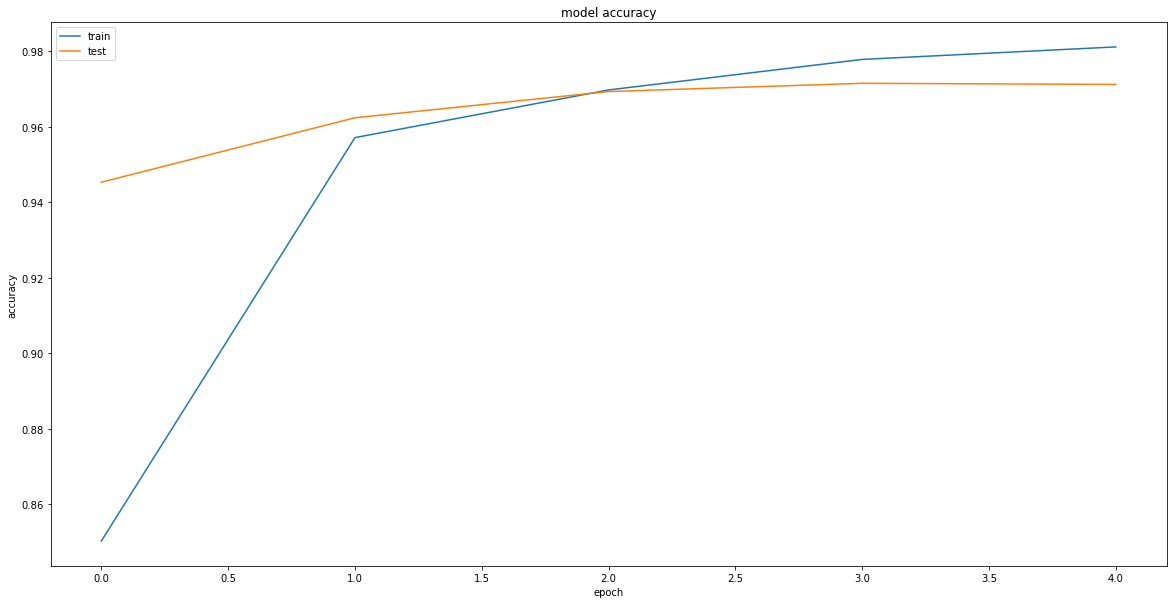

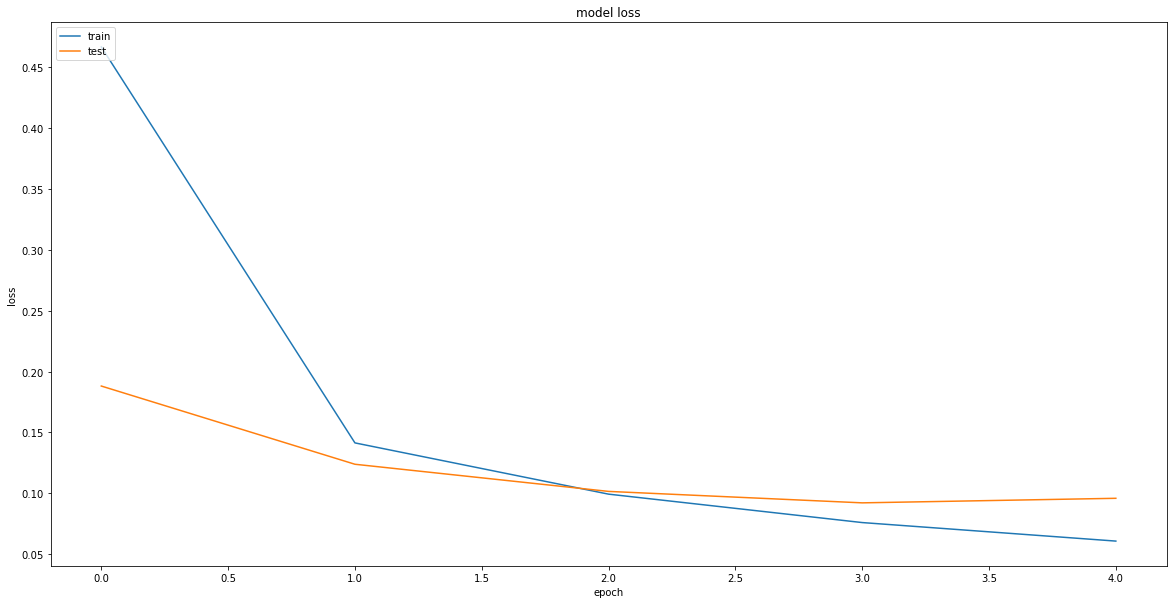

In [63]:
# list all data in history
print(history.history.keys())
plt.figure(figsize=(20,10))
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [34]:
test_loss, test_acc = model.evaluate(X_test,Y_test)
print(test_loss)
print(test_acc)

263/263 [==============================] - 4s 15ms/step - loss: 0.0744 - accuracy: 0.9765
0.07443086057901382
0.9765475988388062


In [35]:
predictions = model.predict([X_test])

In [36]:
print(predictions)

[[2.8099035e-04 1.8321474e-05 1.8160235e-03 ... 8.8673325e-05
  9.9316335e-01 3.7408832e-03]
 [2.0970772e-05 9.9963760e-01 9.4241132e-06 ... 1.5754772e-04
  8.2226597e-07 3.1010029e-05]
 [4.3091796e-07 2.0293179e-05 2.2586983e-07 ... 1.7261865e-03
  2.9631055e-05 9.9717027e-01]
 ...
 [5.4043774e-08 5.6148369e-06 9.7104539e-06 ... 2.6367548e-05
  1.0324961e-05 1.4060714e-06]
 [9.9484456e-01 3.8677794e-07 9.4654042e-06 ... 1.6540562e-05
  8.9029292e-08 4.2015878e-03]
 [1.3377054e-07 3.3763769e-08 2.7997286e-08 ... 2.3814337e-05
  1.0299838e-05 9.9996269e-01]]


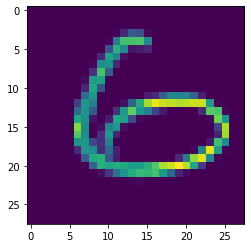

In [32]:
plt.imshow(X_test[10])


In [38]:
print(np.argmax(predictions[10]))

6


In [40]:
# pip install opencv_python
import cv2

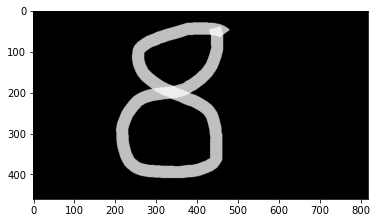

In [42]:
img = cv2.imread('../Handwritten_Digit_Recognition/img/eight.png')
plt.imshow(img)

In [44]:
img.shape

(460, 819, 3)

In [45]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [46]:
gray.shape

(460, 819)

In [48]:
resize = cv2.resize(gray, (28,28),interpolation=cv2.INTER_AREA)

In [49]:
resize.shape

(28, 28)

In [51]:
new_img = tf.keras.utils.normalize(resize,axis=1)
new_img = np.array(new_img).reshape(-1,IMG_SIZE,IMG_SIZE,1)
new_img.shape

(1, 28, 28, 1)

In [52]:
pred = model.predict(new_img)

In [53]:
print(np.argmax(pred))

8
